In [1]:
import copy
import json
import os
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import torch_geometric

from parse_logs import parse_logs
from construct_graph import make_graph, convert_to_pyg_homogenous

LOGS_DIR="../../ALL_LOGS/"
PKL_DIR="../../NEW_DATA/"

In [2]:
all_networkx_graphs = dict()
all_pyg_graphs = dict()

exceptions = []
for file in os.listdir(LOGS_DIR):
    if file.endswith(".log"):
        print(f"Started processing {file}")
        
        nodes, events = parse_logs(os.path.join(LOGS_DIR, file))
        try:
            G, stack = make_graph(nodes, events, log_path=os.path.join(LOGS_DIR, file))
        except:
            exceptions.append(file)
        
        G_copy = copy.deepcopy(G)
        
        all_networkx_graphs[file] = G
        all_pyg_graphs[file] = convert_to_pyg_homogenous(G_copy)
print(LOGS_DIR, exceptions)

Started processing gzip_cpu0.6_mem12_random40_lvl6_run2.log
Using cache: ../../ALL_LOGS/gzip_cpu0.6_mem12_random40_lvl6_run2.graphcache
Started processing gzip_cpu0.4_mem6_webster_lvl5_run2.log
Using cache: ../../ALL_LOGS/gzip_cpu0.4_mem6_webster_lvl5_run2.graphcache
Started processing gzip_cpu0.1_mem6_dickens_lvl7_run3.log
Using cache: ../../ALL_LOGS/gzip_cpu0.1_mem6_dickens_lvl7_run3.graphcache
Started processing gzip_cpu0.6_memnolimit_dickens_lvl9_run3.log
Using cache: ../../ALL_LOGS/gzip_cpu0.6_memnolimit_dickens_lvl9_run3.graphcache
Started processing gzip_cpu0.9_mem12_xml_lvl9_run2.log
Using cache: ../../ALL_LOGS/gzip_cpu0.9_mem12_xml_lvl9_run2.graphcache
Started processing gzip_cpu0.6_mem6_osdb_lvl7_run1.log
Using cache: ../../ALL_LOGS/gzip_cpu0.6_mem6_osdb_lvl7_run1.graphcache
Started processing gzip_cpu0.8_mem12_random40_lvl3_run2.log
Using cache: ../../ALL_LOGS/gzip_cpu0.8_mem12_random40_lvl3_run2.graphcache
Started processing gzip_cpu0.4_memnolimit_xml_lvl8_run2.log
Using ca

In [3]:
len(all_networkx_graphs), len(all_pyg_graphs)

(12894, 12894)

In [5]:
import pickle

# Write all networkx and pyg graphs to files
if len(all_networkx_graphs) > 0:
    for file, G in all_networkx_graphs.items():
        with open(os.path.join(PKL_DIR, 'networkx.pkl'), 'ab') as netx: 
            pickle.dump((file, G), netx)
        print(f"Pickled networkx graph for {file}")
print(f"Successfully picked all networkx graphs to {os.path.join(PKL_DIR, 'networkx.pkl')}\n")

if len(all_pyg_graphs) > 0:
    for file, G in all_pyg_graphs.items():
        with open(os.path.join(PKL_DIR, 'pyg_simplified.pkl'), 'ab') as pyg: 
            pickle.dump((file, G), pyg)
        print(f"Pickled pyg graph for {file}")
print(f"Successfully picked all pyg graphs to {os.path.join(PKL_DIR, 'pyg_simplified.pkl')}\n")

Pickled networkx graph for gzip_cpu0.6_mem12_random40_lvl6_run2.log
Pickled networkx graph for gzip_cpu0.4_mem6_webster_lvl5_run2.log
Pickled networkx graph for gzip_cpu0.1_mem6_dickens_lvl7_run3.log
Pickled networkx graph for gzip_cpu0.6_memnolimit_dickens_lvl9_run3.log
Pickled networkx graph for gzip_cpu0.9_mem12_xml_lvl9_run2.log
Pickled networkx graph for gzip_cpu0.6_mem6_osdb_lvl7_run1.log
Pickled networkx graph for gzip_cpu0.8_mem12_random40_lvl3_run2.log
Pickled networkx graph for gzip_cpu0.4_memnolimit_xml_lvl8_run2.log
Pickled networkx graph for gzip_cpu0.5_mem6_samba_lvl3_run2.log
Pickled networkx graph for gzip_cpu1.0_mem6_nci_lvl2_run3.log
Pickled networkx graph for gzip_cpu0.2_mem12_random10_lvl4_run1.log
Pickled networkx graph for gzip_cpu0.8_mem12_webster_lvl3_run3.log
Pickled networkx graph for gzip_cpu0.7_mem12_samba_lvl7_run1.log
Pickled networkx graph for gzip_cpu0.2_memnolimit_xml_lvl7_run3.log
Pickled networkx graph for gzip_cpu0.3_mem6_osdb_lvl9_run2.log
Pickled n

networkx graphs loaded
pyg graphs loaded
Plotting networkx graphs...
Displaying networkx graph for gzip_cpu0.6_mem12_random40_lvl6_run2.log


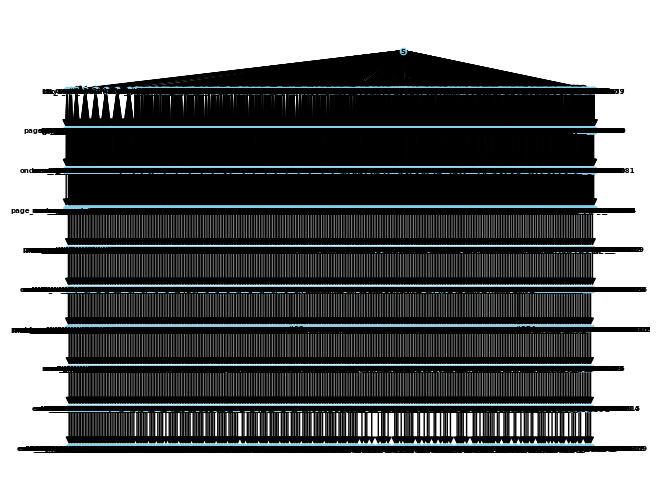

Displaying networkx graph for gzip_cpu0.4_mem6_webster_lvl5_run2.log


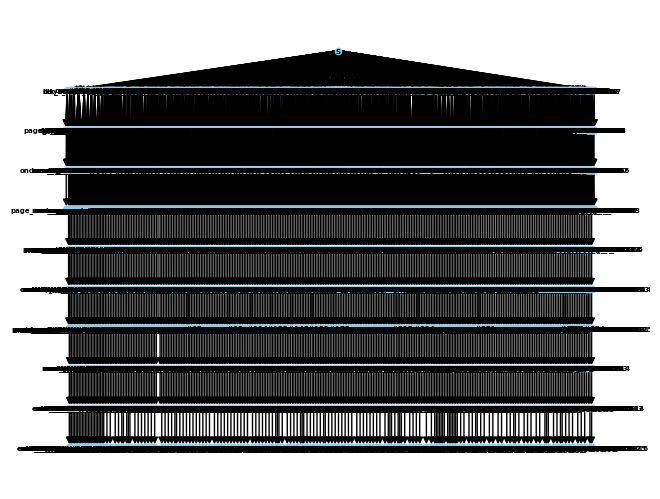

Displaying networkx graph for gzip_cpu0.1_mem6_dickens_lvl7_run3.log


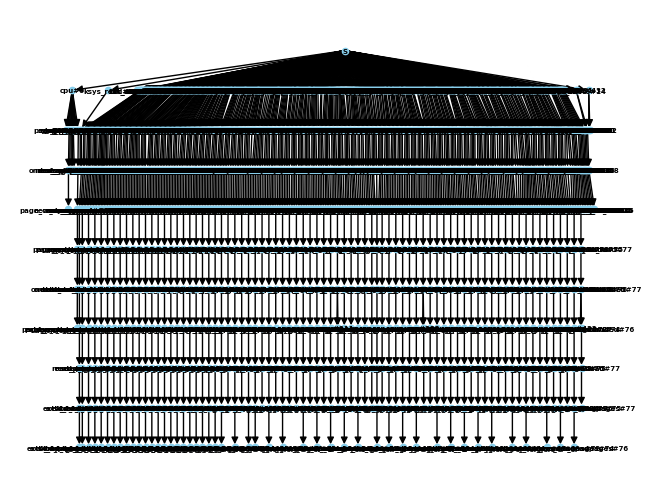

Displaying networkx graph for gzip_cpu0.6_memnolimit_dickens_lvl9_run3.log


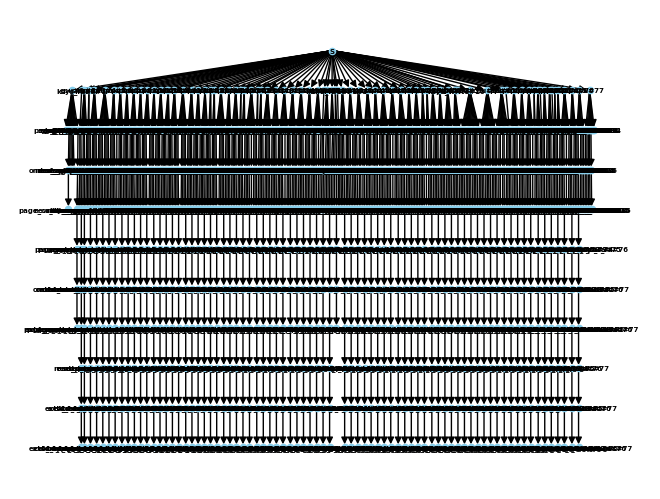

Displaying networkx graph for gzip_cpu0.9_mem12_xml_lvl9_run2.log


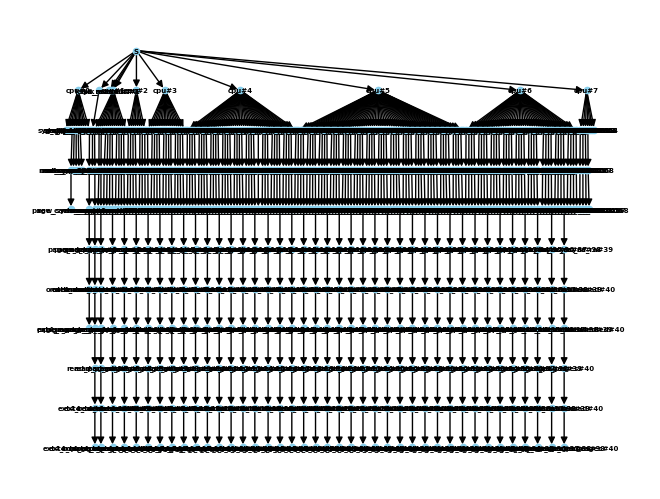

Plotting pyg graphs...
Displaying pyg graph for gzip_cpu0.6_mem12_random40_lvl6_run2.log


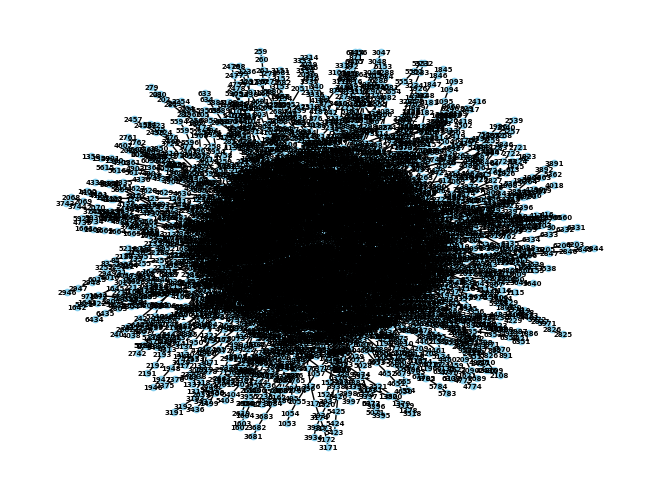

Displaying pyg graph for gzip_cpu0.4_mem6_webster_lvl5_run2.log


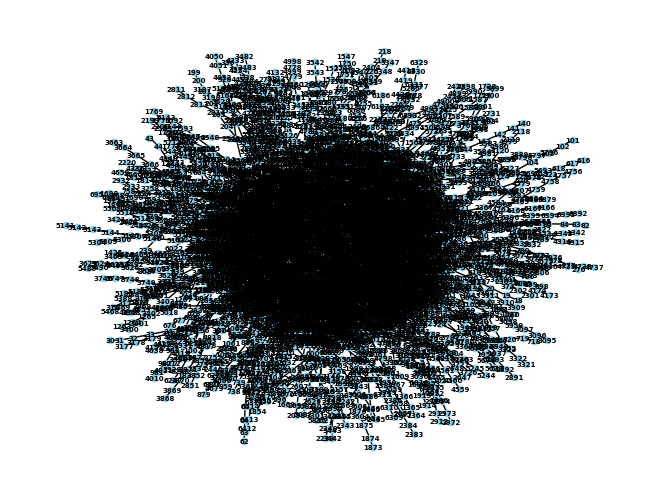

Displaying pyg graph for gzip_cpu0.1_mem6_dickens_lvl7_run3.log


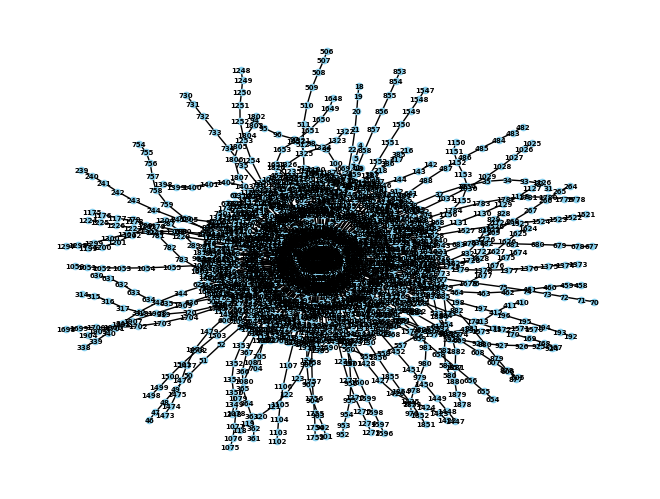

Displaying pyg graph for gzip_cpu0.6_memnolimit_dickens_lvl9_run3.log


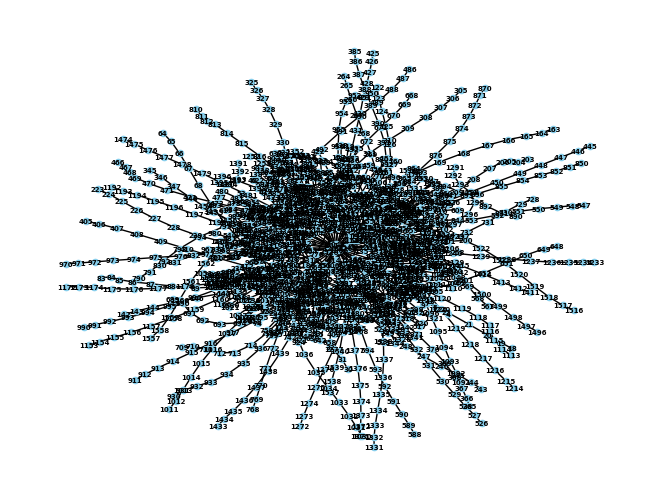

Displaying pyg graph for gzip_cpu0.9_mem12_xml_lvl9_run2.log


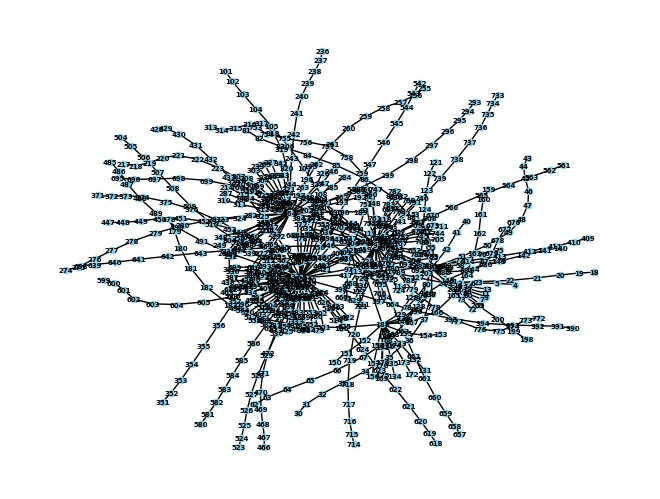

In [11]:
import pickle
import glob
from torch_geometric.utils import to_networkx

NUM_GRAPHS = 5 # Number of graphs to extract from pickled file
pkl_networkx_graphs = dict()
pkl_pyg_graphs = dict()

# Extract all graphs from .pkl files if they exist and plot them
if glob.glob(os.path.join(PKL_DIR, f"*.pkl")):
    try:
        with open(os.path.join(PKL_DIR, 'networkx.pkl'), 'rb') as file:
            try:
                for _ in range(NUM_GRAPHS):
                    f, networkx_graph = pickle.load(file)
                    pkl_networkx_graphs[f] = networkx_graph
            except EOFError as eof:
                print(f"[EOFError] Failed to load networkx graphs: {eof}")
        print("networkx graphs loaded")
    except Exception as e:
        print(f"Failed to load networkx graphs: {e}")
    try:
        with open(os.path.join(PKL_DIR, 'pyg_simplified.pkl'), 'rb') as file:
            try:
                for _ in range(NUM_GRAPHS):
                    f, pyg_graph = pickle.load(file)
                    pkl_pyg_graphs[f] = pyg_graph
            except EOFError as eof:
                print(f"[EOFError] Failed to load pyg graphs: {eof}")
        print("pyg graphs loaded")
    except Exception as e:
        print(f"Failed to load pyg graphs: {e}")

    if pkl_networkx_graphs:
        print("Plotting networkx graphs...")
        for file, G in pkl_networkx_graphs.items():
            print(f"Displaying networkx graph for {file}")
            pos = nx.nx_agraph.graphviz_layout(G, prog="dot", root='S')
            nx.draw(G, pos, with_labels=True, node_size=20, node_color="skyblue", font_size=5, font_weight="bold")
            plt.show()

    if pkl_pyg_graphs:
        print("Plotting pyg graphs...")
        for file, G in pkl_pyg_graphs.items():
            print(f"Displaying pyg graph for {file}")
            G_nx = to_networkx(G, to_undirected=True)
            pos = nx.spring_layout(G_nx)
            nx.draw(G_nx, pos, with_labels=True, node_size=20, node_color="skyblue", font_size=5, font_weight="bold")
            plt.show()
else:
    print("No .pkl files found in the logs directory.")